In [ ]:
!nvidia-smi

Wed Jul 19 06:13:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Downloading Dataset using OID Github

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 14.22 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!pip install -r /content/OIDv4_ToolKit/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9


[OID Dataset Video](https://www.youtube.com/watch?v=dA4pVGQ1isk&t=10s)

In [ ]:
import os

with open("classes.txt", "w") as f:
  f.write("Apple\nOrange\nPerson")

In [ ]:
!python3 /content/OIDv4_ToolKit/main.py downloader --classes Apple Orange Person --type_csv validation --limit 40  --Dataset Dataset --multiclass 1 -y


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Apple', 'Orange', 'Person'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Automatic download.
...145%, 0 MB, 49126 KB/s, 0 seconds passed
[DOWNLOAD] | File

## Refer this youtube link for fine tuning faster rcnn for custom dataset

credit goes to him 🦸
[click here to watch video](https://https://youtu.be/qC4yEiJOJtM)

To learn more [Faster RCNN](https://youtu.be/68VE1gebfVc)

In [ ]:
import torch
import torchvision
# from load import load_model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:

def load_model(num_classes : int):
    # Downloads model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
    return model

In [ ]:
model = load_model(num_classes=3)
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 259MB/s]


In [ ]:
!nvidia-smi

Wed Jul 19 06:14:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    25W /  70W |    769MiB / 15360MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image , ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from torchvision import transforms as T

In [ ]:
print("length of images ==> ",len(os.listdir("/content/OID/Dataset/validation/Apple_Orange_Person")) - 1)

length of images ==>  120


## To train Faster R-CNN using PyTorch on the OID v4 dataset, you'll need to follow several steps. Here's a high-level overview of the process:

 # **Dataset Preparatiom**

Download the OID v4 dataset and extract the images and annotations.
Convert the annotations into a format compatible with PyTorch, such as Pascal VOC or COCO format.
Split the dataset into training and validation sets.
Model Setup:

Install the required dependencies, including PyTorch and torchvision.
Create a Faster R-CNN model architecture using torchvision's pre-trained models or define your own model.
Data Loading:

Implement a custom dataset class in PyTorch, which loads the images and corresponding annotations.
Create data loaders to efficiently load the data during training and validation.
Training:

Define the training parameters, including learning rate, number of epochs, and batch size.
Implement the training loop, where you forward propagate the inputs through the network, calculate the loss, and backpropagate to update the model's weights.
Monitor the training progress and save checkpoints periodically.
Evaluation:

Evaluate the trained model on the validation set to measure its performance using metrics like mean average precision (mAP).
Fine-tune the model if necessary based on the evaluation results.
Inference:

Load the trained model.
Prepare test images or a separate test set.
Run inference on the test images using the trained model to detect objects and visualize the results.

In [ ]:
!git clone https://github.com/AtriSaxena/OIDv4_to_VOC.git

Cloning into 'OIDv4_to_VOC'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (8/8), done.
remote: Total 26 (delta 7), reused 7 (delta 7), pack-reused 18
Unpacking objects: 100% (26/26), 9.57 KiB | 1.06 MiB/s, done.


In [ ]:
!mkdir xml

In [ ]:
!python3 /content/OIDv4_to_VOC/OIDv4_to_VOC.py --sourcepath  /content/OID/Dataset/validation/Apple_Orange_Person --dest_path /content/xml/


In [ ]:
!mkdir image

In [ ]:
!cp /content/OID/Dataset/validation/Apple_Orange_Person/*.jpg /content/image/

In [ ]:
import os, sys, random
import xml.etree.ElementTree as ET

In [ ]:
import os
import xml.etree.ElementTree as ET

class XMLParser:
    def __init__(self, xml_folder, image_folder):
        self.xml_folder = xml_folder
        self.image_folder = image_folder

    def parse_xml(self, xml_file):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        image_filename = root.find("filename").text
        image_path = os.path.join(self.image_folder, image_filename)

        bbox_list = []
        label_list = []

        for obj in root.findall("object"):
            label = obj.find("name").text
            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)

            bbox_list.append([xmin, ymin, xmax, ymax])
            label_list.append(label)

        return image_path, bbox_list, label_list

xml_folder = "/content/xml/"
image_folder = "/content/image"

xml_parser = XMLParser(xml_folder, image_folder)

# List all XML files in the folder
xml_files = [os.path.join(xml_folder, file) for file in os.listdir(xml_folder) if file.endswith(".xml")]

for xml_file in xml_files:
    image_path, bbox_list, label_list = xml_parser.parse_xml(xml_file)
    print("Image File:", image_path)
    print("Bounding Boxes:", bbox_list)
    print("Labels:", label_list)
    print("---")


Image File: /content/image/c99db9c3802cb506.jpg
Bounding Boxes: [[90, 162, 912, 573], [976, 242, 1023, 404]]
Labels: ['Apple', 'Apple']
---
Image File: /content/image/a0c7bb3a01ecc4b9.jpg
Bounding Boxes: [[0, 0, 1024, 768]]
Labels: ['Orange']
---
Image File: /content/image/f168f75ef492fc4d.jpg
Bounding Boxes: [[0, 0, 1024, 768]]
Labels: ['Apple']
---
Image File: /content/image/69974d01b659acfe.jpg
Bounding Boxes: [[0, 767, 275, 1021], [0, 278, 241, 654], [135, 1, 424, 357], [332, 365, 639, 712]]
Labels: ['Orange', 'Orange', 'Orange', 'Orange']
---
Image File: /content/image/f6bdc72ea62ba119.jpg
Bounding Boxes: [[0, 82, 683, 1023]]
Labels: ['Person']
---
Image File: /content/image/41e2356b97f775c4.jpg
Bounding Boxes: [[91, 425, 362, 732], [668, 463, 929, 743]]
Labels: ['Apple', 'Apple']
---
Image File: /content/image/672649d03eb7248b.jpg
Bounding Boxes: [[4, 28, 590, 584]]
Labels: ['Orange']
---
Image File: /content/image/224514debcb913f2.jpg
Bounding Boxes: [[164, 58, 713, 575]]
Labels

[Read this](https://debuggercafe.com/custom-object-detection-using-pytorch-faster-rcnn/) to train fasterrcnn

In [ ]:
!mkdir train
!mkdir val

In [ ]:
!cp /content/image/* -r /content/train/
!cp /content/image/* -r /content/val/
!cp /content/xml/* -r /content/train/

In [ ]:
#config
import torch

BATCH_SIZE = 10 # increase / decrease according to GPU memeory
RESIZE_TO = 512 # resize the image for training and transforms
NUM_EPOCHS = 10 # number of epochs to train for

DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# training images and XML files directory
TRAIN_DIR = '/content/train/'
# validation images and XML files directory
VALID_DIR = '/content/train/'

# classes: 0 index is reserved for background
CLASSES = [
    'Apple', 'Orange', 'Person'
]
NUM_CLASSES = 3

# whether to visualize images after crearing the data loaders
VISUALIZE_TRANSFORMED_IMAGES = False

# location to save model and plots
OUT_DIR = '/content/outputs'
SAVE_PLOTS_EPOCH = 2 # save loss plots after these many epochs
SAVE_MODEL_EPOCH = 2 # save model after these many epochs

In [ ]:
#utils.py
import albumentations as A
import cv2
import numpy as np

from albumentations.pytorch import ToTensorV2
# from config import DEVICE, CLASSES as classes

# this class keeps track of the training and validation loss values...
# ... and helps to get the average for each epoch as well
class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

In [ ]:
# define the training tranforms
def get_train_transform():
    return A.Compose([
        A.Flip(0.5),
        A.RandomRotate90(0.5),
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
        ToTensorV2(p=1.0),
    ], bbox_params={
        'format': 'pascal_voc',
        'label_fields': ['labels']
    })

# define the validation transforms
def get_valid_transform():
    return A.Compose([
        ToTensorV2(p=1.0),
    ], bbox_params={
        'format': 'pascal_voc',
        'label_fields': ['labels']
    })
def collate_fn(batch):
    """
    To handle the data loading as different images may have different number
    of objects and to handle varying size tensors as well.
    """
    return tuple(zip(*batch))

In [ ]:
def show_tranformed_image(train_loader):
    """
    This function shows the transformed images from the `train_loader`.
    Helps to check whether the tranformed images along with the corresponding
    labels are correct or not.
    Only runs if `VISUALIZE_TRANSFORMED_IMAGES = True` in config.py.
    """
    if len(train_loader) > 0:
        for i in range(1):
            images, targets = next(iter(train_loader))
            images = list(image.to(DEVICE) for image in images)
            targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
            boxes = targets[i]['boxes'].cpu().numpy().astype(np.int32)
            sample = images[i].permute(1, 2, 0).cpu().numpy()
            for box in boxes:
                cv2.rectangle(sample,
                            (box[0], box[1]),
                            (box[2], box[3]),
                            (0, 0, 255), 2)
            cv2.imshow('Transformed image', sample)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

In [ ]:
# dataset preparation
import torch
import cv2
import numpy as np
import os
import glob as glob

from xml.etree import ElementTree as et
# from config import CLASSES, RESIZE_TO, TRAIN_DIR, VALID_DIR, BATCH_SIZE
from torch.utils.data import Dataset, DataLoader
# from utils import collate_fn, get_train_transform, get_valid_transform



In [ ]:
import torch
import cv2
import numpy as np
import os
import glob as glob

from xml.etree import ElementTree as et

# the dataset class
class CustomDataLoader(Dataset):
    def __init__(self, dir_path, width, height, classes, transforms=None):
        self.transforms = transforms
        self.dir_path = dir_path
        self.height = height
        self.width = width
        self.classes = classes

        # get all the image paths in sorted order
        self.image_paths = glob.glob(f"{self.dir_path}/*.jpg")
        self.all_images = [image_path.split('/')[-1] for image_path in self.image_paths]
        self.all_images = sorted(self.all_images)

    def __getitem__(self, idx):
        # capture the image name and the full image path
        image_name = self.all_images[idx]
        image_path = os.path.join(self.dir_path, image_name)

        # read the image
        image = cv2.imread(image_path)
        # convert BGR to RGB color format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image_resized = cv2.resize(image, (self.width, self.height))
        image_resized /= 255.0

        # capture the corresponding XML file for getting the annotations
        annot_filename = image_name[:-4] + '.xml'
        annot_file_path = os.path.join(self.dir_path, annot_filename)

        boxes = []
        labels = []
        tree = et.parse(annot_file_path)
        root = tree.getroot()

        # get the height and width of the image
        image_width = image.shape[1]
        image_height = image.shape[0]

        # box coordinates for xml files are extracted and corrected for image size given
        for member in root.findall('object'):
            # map the current object name to `classes` list to get...
            # ... the label index and append to `labels` list
            labels.append(self.classes.index(member.find('name').text))

            # xmin = left corner x-coordinates
            xmin = int(member.find('bndbox').find('xmin').text)
            # xmax = right corner x-coordinates
            xmax = int(member.find('bndbox').find('xmax').text)
            # ymin = left corner y-coordinates
            ymin = int(member.find('bndbox').find('ymin').text)
            # ymax = right corner y-coordinates
            ymax = int(member.find('bndbox').find('ymax').text)

            # resize the bounding boxes according to the...
            # ... desired `width`, `height`
            xmin_final = (xmin/image_width)*self.width
            xmax_final = (xmax/image_width)*self.width
            ymin_final = (ymin/image_height)*self.height
            yamx_final = (ymax/image_height)*self.height

            boxes.append([xmin_final, ymin_final, xmax_final, yamx_final])

        # bounding box to tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # area of the bounding boxes
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # no crowd instances
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)
        # labels to tensor
        labels = torch.as_tensor(labels, dtype=torch.int64)

        # prepare the final `target` dictionary
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["area"] = area
        target["iscrowd"] = iscrowd
        image_id = torch.tensor([idx])
        target["image_id"] = image_id

        # apply the image transforms
        if self.transforms:
            sample = self.transforms(image = image_resized,
                                     bboxes = target['boxes'],
                                     labels = labels)
            image_resized = sample['image']
            target['boxes'] = torch.Tensor(sample['bboxes'])

        return image_resized, target

    def __len__(self):
        return len(self.all_images)


In [ ]:
# prepare the final datasets and data loaders
train_dataset = CustomDataLoader(TRAIN_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_train_transform())
valid_dataset = CustomDataLoader(VALID_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_valid_transform())
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,
    collate_fn=collate_fn
)
valid_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    collate_fn=collate_fn
)
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}\n")

Number of training samples: 120
Number of validation samples: 120



In [ ]:
!mkdir outputs

In [ ]:
from tqdm import tqdm

def train(train_data_loader, model):
    print('Training')
    global train_itr
    global train_loss_list

     # initialize tqdm progress bar
    prog_bar = tqdm(train_data_loader, total=len(train_data_loader))

    for i, data in enumerate(prog_bar):
        optimizer.zero_grad()
        images, targets = data

        images = list(image.to(DEVICE) for image in images)
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        train_loss_list.append(loss_value)

        train_loss_hist.send(loss_value)

        losses.backward()
        optimizer.step()

        train_itr += 1

        # update the loss value beside the progress bar for each iteration
        prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")
    return train_loss_list

def validate(valid_data_loader, model):
    print('Validating')
    global val_itr
    global val_loss_list

    # initialize tqdm progress bar
    prog_bar = tqdm(valid_data_loader, total=len(valid_data_loader))

    for i, data in enumerate(prog_bar):
        images, targets = data

        images = list(image.to(DEVICE) for image in images)
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

        with torch.no_grad():
            loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        val_loss_list.append(loss_value)

        val_loss_hist.send(loss_value)

        val_itr += 1

        # update the loss value beside the progress bar for each iteration
        prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")
    return val_loss_list

params = [p for p in model.parameters() if p.requires_grad]
# define the optimizer
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)

# initialize the Averager class
train_loss_hist = Averager()
val_loss_hist = Averager()
train_itr = 1
val_itr = 1
# train and validation loss lists to store loss values of all...
# ... iterations till ena and plot graphs for all iterations
train_loss_list = []
val_loss_list = []

# name to save the trained model with
MODEL_NAME = 'model'

# whether to show transformed images from data loader or not
if VISUALIZE_TRANSFORMED_IMAGES:
    show_tranformed_image(train_loader)

# start the training epochs
for epoch in range(NUM_EPOCHS):
    print(f"\nEPOCH {epoch+1} of {NUM_EPOCHS}")

    # reset the training and validation loss histories for the current epoch
    train_loss_hist.reset()
    val_loss_hist.reset()

    # create two subplots, one for each, training and validation
    figure_1, train_ax = plt.subplots()
    figure_2, valid_ax = plt.subplots()

    # start timer and carry out training and validation
    train_loss = train(train_loader, model)
    val_loss = validate(valid_loader, model)
    print(f"Epoch #{epoch} train loss: {train_loss_hist.value:.3f}")
    print(f"Epoch #{epoch} validation loss: {val_loss_hist.value:.3f}")
    # end = time.time()
    # print(f"Took {((end - start) / 60):.3f} minutes for epoch {epoch}")

    if (epoch+1) % SAVE_MODEL_EPOCH == 0: # save model after every n epochs
        torch.save(model.state_dict(), f"{OUT_DIR}/model{epoch+1}.pth")
        print('SAVING MODEL COMPLETE...\n')

    if (epoch+1) % SAVE_PLOTS_EPOCH == 0: # save loss plots after n epochs
        train_ax.plot(train_loss, color='blue')
        train_ax.set_xlabel('iterations')
        train_ax.set_ylabel('train loss')
        valid_ax.plot(val_loss, color='red')
        valid_ax.set_xlabel('iterations')
        valid_ax.set_ylabel('validation loss')
        figure_1.savefig(f"{OUT_DIR}/train_loss_{epoch+1}.png")
        figure_2.savefig(f"{OUT_DIR}/valid_loss_{epoch+1}.png")
        print('SAVING PLOTS COMPLETE...')

    if (epoch+1) == NUM_EPOCHS: # save loss plots and model once at the end
        train_ax.plot(train_loss, color='blue')
        train_ax.set_xlabel('iterations')
        train_ax.set_ylabel('train loss')
        valid_ax.plot(val_loss, color='red')
        valid_ax.set_xlabel('iterations')
        valid_ax.set_ylabel('validation loss')
        figure_1.savefig(f"{OUT_DIR}/train_loss_{epoch+1}.png")
        figure_2.savefig(f"{OUT_DIR}/valid_loss_{epoch+1}.png")

        torch.save(model.state_dict(), f"{OUT_DIR}/model{epoch+1}.pth")

plt.close('all')


EPOCH 1 of 10
Training


Loss: 0.8378: 100%|██████████| 12/12 [00:20<00:00,  1.69s/it]


Validating


Loss: 0.3583: 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch #0 train loss: 0.375
Epoch #0 validation loss: 0.354

EPOCH 2 of 10
Training


Loss: 0.4764: 100%|██████████| 12/12 [00:20<00:00,  1.72s/it]


Validating


Loss: 0.3219: 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch #1 train loss: 0.336
Epoch #1 validation loss: 0.323
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 3 of 10
Training


Loss: 0.2344: 100%|██████████| 12/12 [00:20<00:00,  1.68s/it]


Validating


Loss: 0.3081: 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch #2 train loss: 0.321
Epoch #2 validation loss: 0.307

EPOCH 4 of 10
Training


Loss: 0.2415: 100%|██████████| 12/12 [00:20<00:00,  1.70s/it]


Validating


Loss: 0.2765: 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch #3 train loss: 0.300
Epoch #3 validation loss: 0.289
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 5 of 10
Training


Loss: 0.3644: 100%|██████████| 12/12 [00:20<00:00,  1.68s/it]


Validating


Loss: 0.2590: 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch #4 train loss: 0.285
Epoch #4 validation loss: 0.277

EPOCH 6 of 10
Training


Loss: 0.3635: 100%|██████████| 12/12 [00:20<00:00,  1.68s/it]


Validating


Loss: 0.2588: 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch #5 train loss: 0.272
Epoch #5 validation loss: 0.269
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 7 of 10
Training


Loss: 0.2255: 100%|██████████| 12/12 [00:20<00:00,  1.69s/it]


Validating


Loss: 0.2423: 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]


Epoch #6 train loss: 0.263
Epoch #6 validation loss: 0.258

EPOCH 8 of 10
Training


Loss: 0.2508: 100%|██████████| 12/12 [00:20<00:00,  1.69s/it]


Validating


Loss: 0.2401: 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch #7 train loss: 0.256
Epoch #7 validation loss: 0.249
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 9 of 10
Training


Loss: 0.2974: 100%|██████████| 12/12 [00:20<00:00,  1.70s/it]


Validating


Loss: 0.2187: 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch #8 train loss: 0.243
Epoch #8 validation loss: 0.239

EPOCH 10 of 10
Training


Loss: 0.2602: 100%|██████████| 12/12 [00:20<00:00,  1.69s/it]


Validating


Loss: 0.2088: 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch #9 train loss: 0.236
Epoch #9 validation loss: 0.231
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...


In [ ]:
import numpy as np
import cv2
import torch
import glob as glob



# set the computation device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# load the model and the trained weights
model = load_model(num_classes=3).to(device)
model.load_state_dict(torch.load(
    '/content/outputs/model10.pth', map_location=device
))
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!mkdir test_data

In [ ]:
!cp /content/train/025e3864b9d93d5b.jpg -r /content/test_data/

In [ ]:
# directory where all the images are present
DIR_TEST = '/content/test_data/'
test_images = glob.glob(f"{DIR_TEST}/*")
print(f"Test instances: {len(test_images)}")

# classes: 0 index is reserved for background
CLASSES = [
    'Apple', 'Orange', 'Person'
]

# define the detection threshold...
# ... any detection having score below this will be discarded
detection_threshold = 0.3

Test instances: 1


<ipython-input-49-4d7fc35ac06d>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = np.transpose(image, (2, 0, 1)).astype(np.float)


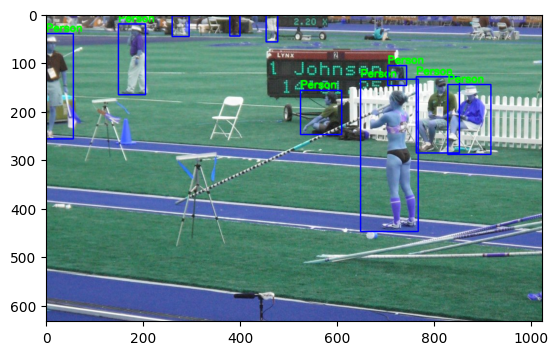

Image 1 done...
--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import cv2

for i in range(len(test_images)):
    # get the image file name for saving output later on
    image_name = test_images[i].split('/')[-1].split('.')[0]
    image = cv2.imread(test_images[i])
    orig_image = image.copy()
    # BGR to RGB
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB).astype(np.float32)
    # make the pixel range between 0 and 1
    image /= 255.0
    # bring color channels to front
    image = np.transpose(image, (2, 0, 1)).astype(np.float)
    # convert to tensor
    image = torch.tensor(image, dtype=torch.float).cuda()
    # add batch dimension
    image = torch.unsqueeze(image, 0)
    with torch.no_grad():
        outputs = model(image)

    # load all detection to CPU for further operations
    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]
    # carry further only if there are detected boxes
    if len(outputs[0]['boxes']) != 0:
        boxes = outputs[0]['boxes'].data.numpy()
        scores = outputs[0]['scores'].data.numpy()
        # filter out boxes according to `detection_threshold`
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        draw_boxes = boxes.copy()
        # get all the predicited class names
        pred_classes = [CLASSES[i] for i in outputs[0]['labels'].cpu().numpy()]

        # draw the bounding boxes and write the class name on top of it
        for j, box in enumerate(draw_boxes):
            cv2.rectangle(orig_image,
                        (int(box[0]), int(box[1])),
                        (int(box[2]), int(box[3])),
                        (0, 0, 255), 2)
            cv2.putText(orig_image, pred_classes[j],
                        (int(box[0]), int(box[1]-5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0),
                        2, lineType=cv2.LINE_AA)

        plt.imshow(orig_image)
        plt.show()
        cv2.waitKey(1)
        cv2.imwrite(f"../test_predictions/{image_name}.jpg", orig_image,)
    print(f"Image {i+1} done...")
    print('-'*50)

# print('TEST PREDICTIONS COMPLETE')
# cv2.destroyAllWindows()